In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tabpfn import TabPFNClassifier

In [2]:
dataset= pd.read_csv("./merged_data.csv")
df1 = dataset
#df1 = dataset.drop(['acc_z_enwacto_1', 'acc_z_enwacto_2', 'acc_z_enwacto_3', 'acc_z_enwacto_4', 'acc_z_enwacto_5', 'acc_z_enwacto_6',
#                    'acc_z_enwacto_7', 'acc_y_enwacto_1', 'acc_y_enwacto_2', 'acc_y_enwacto_3', 'acc_y_enwacto_4', 'acc_y_enwacto_5', 'acc_y_enwacto_6',
#                    'acc_y_enwacto_7', 'acc_x_enwacto_1', 'acc_x_enwacto_2', 'acc_x_enwacto_3', 'acc_x_enwacto_4', 'acc_x_enwacto_5', 'acc_x_enwacto_6',
#                    'acc_x_enwacto_7'], axis=1)

wOkuba = df1[~df1['name'].str.lower().str.contains('kuba')].drop(columns=['name'], axis=1)
kuba = df1[df1['name'].str.lower().str.contains('kuba')].drop(columns=['name'], axis=1)

X_train = wOkuba.drop(columns=['activity'])
Y_train =  np.ravel(wOkuba[['activity']])
X_test = kuba.drop(columns=['activity'])
Y_test = np.ravel(kuba[['activity']])

In [3]:
len(X_train.columns)

115

Accuracy 0.20252167060677698


Text(34.0, 0.5, 'True Labels')

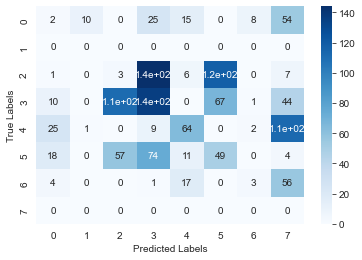

In [104]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf1 = SVC(C=1000, degree=3, gamma='scale', kernel='poly', random_state=42, tol=1e-5, max_iter=1000, shrinking=False,decision_function_shape='ovr',  break_ties=False, coef0=0)
clf = make_pipeline(StandardScaler(), clf1)
clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

F:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy 0.20646178092986603


Text(34.0, 0.5, 'True Labels')

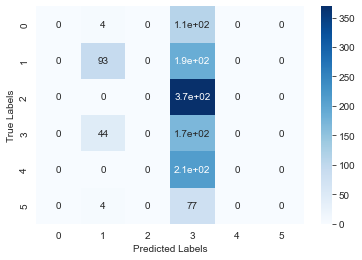

In [91]:
from sklearn.svm import SVC

clf = SVC(C=0.1, gamma='scale', kernel='sigmoid', random_state=42, tol=1e-9, max_iter=1000, shrinking=False,decision_function_shape='ovr',  break_ties=False, coef0=0, class_weight='balanced')
clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

F:\anaconda\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy 0.3199369582348306


Text(34.0, 0.5, 'True Labels')

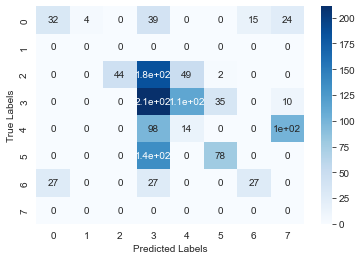

In [87]:
from sklearn.svm import SVC

clf = SVC(C=10000000, gamma=0.0000001, kernel='rbf', random_state=42, tol=1e-9, max_iter=1000, shrinking=False,decision_function_shape='ovr',  break_ties=False, class_weight='balanced')
clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

In [33]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
clf = LinearSVC(random_state=42, tol=1e-5, max_iter=1000)
selector = RFE(clf, n_features_to_select=40, step=1, verbose=3)
selector = selector.fit(X_test, Y_test)
lista = X_train.columns[selector.support_].tolist()

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

In [23]:
lista = ['acc_x_mpf1', 'acc_y_mpf1', 'acc_x_wilson_amp', 'acc_x_crossco',
       'acc_y_crossco', 'acc_y_one_quarter', 'acc_x_corecoef',
       'acc_y_corecoef', 'acc_z_corecoef', 'acc_x_stdev', 'acc_y_stdev',
       'acc_z_stdev', 'acc_y_mad', 'acc_z_mad', 'acc_x_wf',
       'acc_z_median_frequency', 'acc_x_entropy', 'acc_y_entropy',
       'acc_z_entropy', 'acc_x_kurtosis_t', 'acc_y_kurtosis_t',
       'acc_z_kurtosis_t', 'acc_x_skewness_t', 'acc_y_skewness_t',
       'acc_z_skewness_t', 'acc_x_top3', 'acc_y_top3', 'acc_x_autoregyw_1',
       'acc_y_autoregyw_1', 'acc_z_autoregyw_1', 'acc_x_autoregburg_1',
       'acc_x_autoregburg_4', 'acc_y_autoregburg_3', 'acc_y_autoregburg_4',
       'acc_z_autoregburg_4', 'acc_z_enwacto_2', 'acc_z_enwacto_3',
       'acc_z_enwacto_4', 'acc_z_enwacto_5', 'acc_z_enwacto_6',
       'acc_z_enwacto_7', 'acc_y_enwacto_2', 'acc_y_enwacto_3',
       'acc_y_enwacto_4', 'acc_y_enwacto_5', 'acc_y_enwacto_6',
       'acc_y_enwacto_7', 'acc_x_enwacto_2', 'acc_x_enwacto_3',
       'acc_x_enwacto_4', 'acc_x_enwacto_5', 'acc_x_enwacto_6',
       'acc_x_enwacto_7']

In [24]:
X_train.head()

,acc_x_mpf1,acc_y_mpf1,acc_z_mpf1,acc_x_iqr,acc_y_iqr,acc_z_iqr,acc_x_wilson_amp,acc_y_wilson_amp,acc_z_wilson_amp,acc_x_crossco,...,acc_y_enwacto_5,acc_y_enwacto_6,acc_y_enwacto_7,acc_x_enwacto_1,acc_x_enwacto_2,acc_x_enwacto_3,acc_x_enwacto_4,acc_x_enwacto_5,acc_x_enwacto_6,acc_x_enwacto_7
70,1.803692,2.242093,0.410619,0.0,0.0,0.0,400.0,284.0,190.0,1.025016e+07,...,0.003149,0.001086,0.000432,108.966360,0.512535,0.299667,0.012452,0.001337,0.010584,0.004540
71,1.442213,1.935346,0.777883,0.0,0.0,0.0,330.0,108.0,238.0,9.206205e+06,...,0.004580,0.000961,0.000376,107.206291,0.903783,0.604045,0.305433,0.014234,0.002459,0.000195
72,0.561977,0.854240,0.609875,0.0,0.0,0.0,432.0,178.0,238.0,9.787650e+06,...,0.001673,0.000682,0.001078,117.568880,1.462138,0.302145,0.001865,0.000721,0.000295,0.000112
73,0.731976,2.065896,1.178066,0.0,0.0,0.0,390.0,172.0,262.0,1.083696e+07,...,0.003904,0.000477,0.000241,115.566808,0.071149,0.025012,0.000643,0.016899,0.005142,0.000264
74,1.491227,0.544625,0.543213,0.0,0.0,0.0,340.0,74.0,276.0,9.391999e+06,...,0.004300,0.004268,0.001396,104.319500,1.274063,0.030686,0.041264,0.001488,0.001903,0.000305


In [25]:
X_train[lista].head()

,acc_x_mpf1,acc_y_mpf1,acc_x_wilson_amp,acc_x_crossco,acc_y_crossco,acc_y_one_quarter,acc_x_corecoef,acc_y_corecoef,acc_z_corecoef,acc_x_stdev,...,acc_y_enwacto_4,acc_y_enwacto_5,acc_y_enwacto_6,acc_y_enwacto_7,acc_x_enwacto_2,acc_x_enwacto_3,acc_x_enwacto_4,acc_x_enwacto_5,acc_x_enwacto_6,acc_x_enwacto_7
70,1.803692,2.242093,400.0,1.025016e+07,1.971708e+07,0.199601,0.829674,0.328373,0.452665,73.022137,...,0.018009,0.003149,0.001086,0.000432,0.512535,0.299667,0.012452,0.001337,0.010584,0.004540
71,1.442213,1.935346,330.0,9.206205e+06,1.792035e+07,0.199601,-0.741743,-0.319025,0.773255,147.803741,...,0.044628,0.004580,0.000961,0.000376,0.903783,0.604045,0.305433,0.014234,0.002459,0.000195
72,0.561977,0.854240,432.0,9.787650e+06,1.794830e+07,0.199601,-0.429048,0.907583,-0.211364,34.010768,...,0.024478,0.001673,0.000682,0.001078,1.462138,0.302145,0.001865,0.000721,0.000295,0.000112
73,0.731976,2.065896,390.0,1.083696e+07,2.070815e+07,0.199601,0.163644,0.093128,0.915646,76.724714,...,0.036127,0.003904,0.000477,0.000241,0.071149,0.025012,0.000643,0.016899,0.005142,0.000264
74,1.491227,0.544625,340.0,9.391999e+06,1.772265e+07,0.199601,0.548823,0.510930,0.819118,57.707485,...,0.021053,0.004300,0.004268,0.001396,1.274063,0.030686,0.041264,0.001488,0.001903,0.000305


Accuracy 0.18045705279747834


F:\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(34.0, 0.5, 'True Labels')

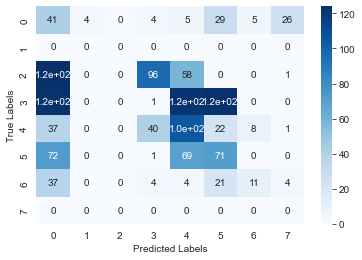

In [26]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, tol=1e-5, max_iter=1000)
clf.fit(X_train[lista],Y_train)
score = clf.score(X_test[lista], Y_test)
y_eval = clf.predict(X_test[lista])
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

F:\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 0.425531914893617


Text(34.0, 0.5, 'True Labels')

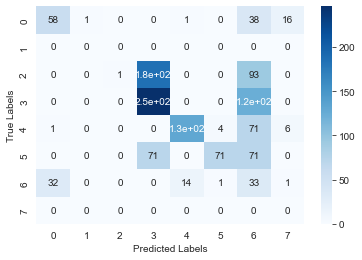

In [3]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, tol=1e-5, max_iter=1000)
clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Accuracy 0.2688679245283019


Text(33.0, 0.5, 'True Labels')

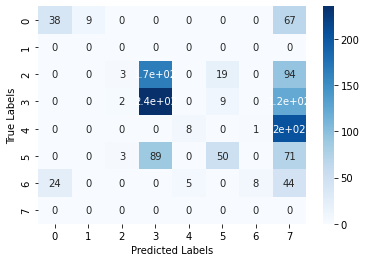

In [20]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
classifier.fit(X_train, Y_train, overwrite_warning=True)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(Y_test, y_eval))
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")